In [107]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [108]:
data_df = pd.read_csv("Visa_For_Lisa_Loan_Modelling.csv", sep=",")

In [109]:
data_df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [110]:
data_df.tail(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


In [111]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [112]:
data_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [113]:
data_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [114]:
data_df = data_df.drop(["ID"], 1)

C:\Users\user\AppData\Local\Temp\ipykernel_4180\2900343017.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_df = data_df.drop(["ID"], 1)


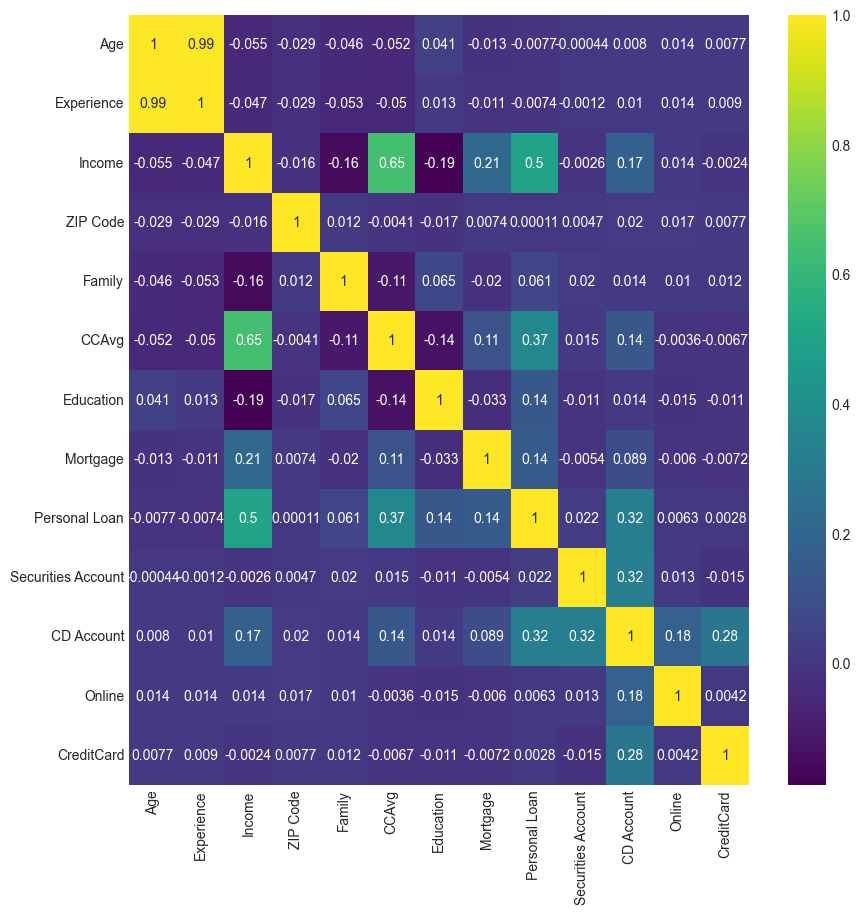

In [115]:
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.heatmap(data_df.corr(), annot = True, cmap = 'viridis')
plt.show()

In [116]:
df = data_df[['Age', 'Experience', 'Income']]
df

,Age,Experience,Income
0,25,1,49
1,45,19,34
2,39,15,11
3,35,9,100
4,35,8,45
...,...,...,...
4995,29,3,40
4996,30,4,15
4997,63,39,24
4998,65,40,49


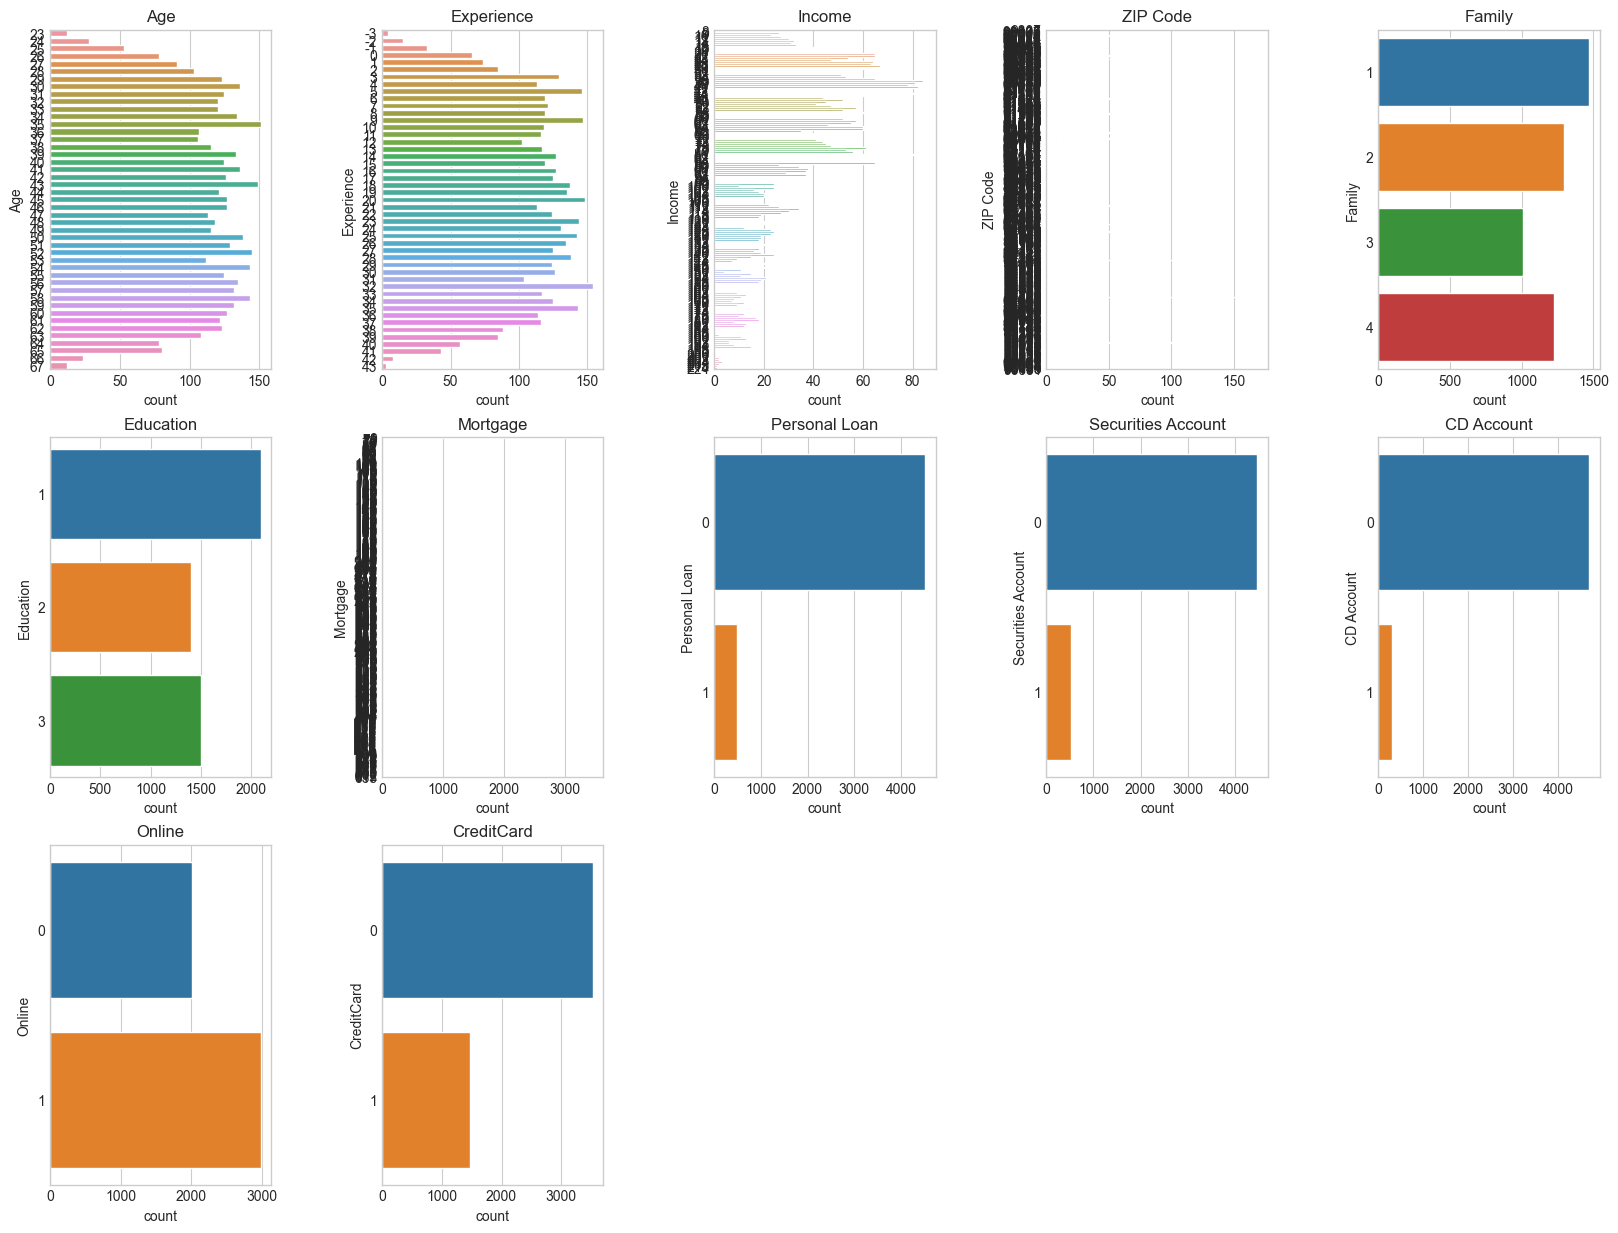

In [117]:
def plot_bivariate_bar(dataset, cols, width, height, hspace, wspace):
    dataset = dataset.select_dtypes(include=[np.int64])
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.int64:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:15] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)

plot_bivariate_bar(data_df, cols=5, width=20, height=15, hspace=0.2, wspace=0.5)

In [118]:
predict = "Experience"
x = data_df.drop([predict], 1)
y = data_df[predict]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=16,
                                   test_size=0.25,
                                   shuffle=True)

C:\Users\user\AppData\Local\Temp\ipykernel_4180\3631957481.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = data_df.drop([predict], 1)


In [119]:
xtrain

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
2622,54,39,90245,4,0.7,2,0,0,0,0,1,0
2560,44,71,93943,2,0.8,3,0,0,0,0,1,0
22,29,62,90277,1,1.2,1,260,0,0,0,1,0
4971,58,73,90024,1,1.4,3,0,0,1,0,0,0
1598,40,85,94550,2,0.4,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4548,58,73,93109,4,0.7,1,241,0,0,0,0,0
635,60,35,90509,3,0.2,1,169,0,0,0,1,0
1345,57,23,92126,2,0.2,3,0,0,0,0,0,0
581,28,55,94521,4,2.2,1,0,0,0,0,1,1


In [120]:
xtest

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4454,50,38,94143,3,0.6,2,0,0,0,0,1,0
350,39,113,94301,1,1.0,3,0,0,1,0,1,0
2064,54,65,94545,4,1.8,3,0,0,0,0,0,1
4053,35,90,94720,2,0.0,1,0,0,0,0,0,0
4925,64,82,94025,4,3.4,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1270,43,60,91311,2,2.2,3,0,0,0,0,0,1
4189,45,93,91116,2,1.7,2,0,0,0,0,0,0
4794,56,29,94110,4,1.5,3,146,0,0,0,0,0
4359,38,58,95054,2,2.8,1,0,0,0,0,1,0


In [121]:
ytrain

2622    28
2560    18
22       5
4971    28
1598    15
        ..
4548    33
635     35
1345    32
581      3
2169    27
Name: Experience, Length: 3750, dtype: int64

In [122]:
ytest

4454    24
350     14
2064    29
4053    11
4925    39
        ..
1270    18
4189    19
4794    30
4359    12
1414    33
Name: Experience, Length: 1250, dtype: int64

In [ ]:
model = LinearRegression()
model.fit(xtrain, ytrain)